In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

titanic_df = pd.read_csv(
    "https://raw.githubusercontent.com/dlsun/data-science-book/master/data/titanic.csv"
)

titanic_df = titanic_df.drop("name", axis=1)
titanic_df = titanic_df.drop("ticket", axis=1)

# filling missing data
titanic_df["age"] = titanic_df["age"].fillna(value=titanic_df["age"].mean())
titanic_df["fare"] = titanic_df["fare"].fillna(value=0.0)

# display(titanic_df.columns)
# display(titanic_df.dtypes)

# 1) Scale the quantitative vars
quant_feat = ["age", "sibsp", "parch", "fare"]
scaler = MinMaxScaler()
quant_titanic_df = titanic_df[quant_feat]
quant_titanic_df = pd.DataFrame(scaler.fit_transform(quant_titanic_df), columns=quant_feat)

titanic_df = titanic_df.drop(quant_feat, axis=1)
titanic_df = pd.concat((titanic_df, quant_titanic_df), axis=1)

# 2) Encode catagorical variables to quantitative variables
catagorical_to_quantitative_maps = {}

# pclass
pclass_quant = pd.get_dummies(titanic_df["pclass"])
pclass_quant["pclass 1"] = pclass_quant[1]
pclass_quant = pclass_quant.drop(1, axis=1)
pclass_quant["pclass 2"] = pclass_quant[2]
pclass_quant = pclass_quant.drop(2, axis=1)
pclass_quant["pclass 3"] = pclass_quant[3]
pclass_quant = pclass_quant.drop(3, axis=1)
titanic_df = titanic_df.drop('pclass', axis=1)
titanic_df = pd.concat((titanic_df, pclass_quant), axis=1)

# gender
catagorical_to_quantitative_maps["sex"] = list(titanic_df["sex"].unique())
gender_catagories = pd.DataFrame(pd.get_dummies(titanic_df["sex"]))
titanic_df = titanic_df.drop("sex", axis = 1)
titanic_df= pd.concat([titanic_df, gender_catagories], axis = 1)
   
# boat
titanic_df["boat"] = titanic_df["boat"].fillna(value="No boat")
catagorical_to_quantitative_maps["boat"] = list(titanic_df["boat"].unique())
boat_catagories = pd.DataFrame(pd.get_dummies(titanic_df["boat"]))
titanic_df = titanic_df.drop("boat", axis = 1)
titanic_df = pd.concat([titanic_df, boat_catagories], axis = 1)
# adjust a few columns to aviod running into problems when creating a column with the same name
# will need to consider this when going backwards
titanic_df["boat C"] = titanic_df["C"]
titanic_df = titanic_df.drop("C", axis=1)
catagorical_to_quantitative_maps["boat"].append("boat C")
catagorical_to_quantitative_maps["boat"].remove("C")
titanic_df["boat D"] = titanic_df["D"]
titanic_df = titanic_df.drop("D", axis=1)
catagorical_to_quantitative_maps["boat"].append("boat D")
catagorical_to_quantitative_maps["boat"].remove("D")

#cabin
catagorical_to_quantitative_maps["cabin"] = list(titanic_df["cabin"].unique())
cabins = pd.DataFrame(pd.get_dummies(titanic_df["cabin"]))
titanic_df = titanic_df.drop("cabin", axis = 1)
titanic_df = pd.concat([titanic_df, cabins], axis = 1)

#embarked
titanic_df["embarked"] = titanic_df["embarked"].fillna(value="entrance unknown")
catagorical_to_quantitative_maps["embarked"] = list(titanic_df["embarked"].unique())
entrances = pd.DataFrame(pd.get_dummies(titanic_df["embarked"]))
titanic_df = titanic_df.drop("embarked", axis = 1)
titanic_df = pd.concat([titanic_df, entrances], axis = 1)


#body
titanic_df["body"] = titanic_df["body"].fillna(value="body unknown")
catagorical_to_quantitative_maps["body"] = list(titanic_df["body"].unique())
bodies = pd.DataFrame(pd.get_dummies(titanic_df["body"]))
titanic_df = titanic_df.drop("body", axis = 1)
titanic_df = pd.concat([titanic_df, bodies], axis = 1)

#home.dest
titanic_df["home.dest"] = titanic_df["home.dest"].fillna(value="home.dest unknown")
catagorical_to_quantitative_maps["home.dest"] = list(titanic_df["home.dest"].unique())
destinations = pd.DataFrame(pd.get_dummies(titanic_df["home.dest"]))
titanic_df = titanic_df.drop("home.dest", axis = 1)
titanic_df = pd.concat([titanic_df, destinations], axis = 1)

# Put class labels on the end
survived = titanic_df['survived']
titanic_df = titanic_df.drop('survived', axis=1)
titanic_df = pd.concat((titanic_df, survived), axis=1)

print(titanic_df.shape)
display(titanic_df)

titanic_df.dtypes
# for col in titanic_df.columns:
#     for val in titanic_df[col]:
#         if type(val) != int and type(val) != float:
#             print(col)
#             print(val)
#             print("\n")

# type(titanic_df.sum().sum())

(1309, 720)


,age,sibsp,parch,fare,pclass 1,pclass 2,pclass 3,female,male,1,...,"Winnipeg, MB","Winnipeg, MN","Woodford County, KY","Worcester, England","Worcester, MA","Yoevil, England / Cottage Grove, OR","Youngstown, OH","Zurich, Switzerland",home.dest unknown,survived
0,0.361169,0.000,0.000000,0.412503,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.009395,0.125,0.222222,0.295806,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0.022964,0.125,0.222222,0.295806,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.373695,0.125,0.222222,0.295806,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.311064,0.125,0.222222,0.295806,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.179540,0.125,0.000000,0.028213,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1305,0.372206,0.125,0.000000,0.028213,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1306,0.329854,0.000,0.000000,0.014102,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1307,0.336117,0.000,0.000000,0.014102,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


age                                    float64
sibsp                                  float64
parch                                  float64
fare                                   float64
pclass 1                                 uint8
                                        ...   
Yoevil, England / Cottage Grove, OR      uint8
Youngstown, OH                           uint8
Zurich, Switzerland                      uint8
home.dest unknown                        uint8
survived                                 int64
Length: 720, dtype: object

For NMF usage, let's make this dataset non-negative **Edited**

In [3]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler

n_feat_synth = 1000
n_inform_feat_synth = 100
n_samples_synth = 100
signed_synth_data, labels = make_classification(n_samples=n_samples_synth, 
                                                n_features=n_feat_synth, 
                                                n_informative=n_inform_feat_synth, 
                                                n_classes=2)

# To Make our data non-negative, we'll scale our data with min-max scaling which puts it into the range of [0, 1]
scaler = MinMaxScaler()
synth_data = scaler.fit_transform(signed_synth_data)

y = pd.DataFrame(labels, columns=["class"]).astype(int)
X = pd.DataFrame(synth_data)
Xy = pd.concat([X, y], axis=1)

Xy.head()

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict


,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,class
0,0.735842,0.499125,0.080070,1.000000,0.633438,0.540958,0.347953,0.562393,0.682926,0.509365,...,0.321522,0.661950,0.385361,0.428576,0.810002,0.495538,0.358085,0.697125,0.318188,1
1,0.573430,0.482120,0.000000,0.484808,0.668216,0.583151,0.806000,0.392444,0.469295,0.570613,...,0.215447,0.640517,0.610189,0.387585,0.804359,0.058573,0.807961,0.479205,0.361349,1
2,0.881533,0.656762,0.753352,0.238703,0.676760,0.601618,0.227428,0.391942,0.435171,0.686181,...,0.588260,0.367389,0.138219,0.444816,0.498597,0.744205,0.303699,0.630176,0.729714,1
3,0.558496,0.358257,0.576545,0.141761,0.712436,0.323352,0.541501,0.467463,0.199298,0.637883,...,0.416638,0.604982,0.383619,0.397534,0.644306,0.643466,0.535092,0.709462,0.420656,1
4,0.487543,0.745820,0.350596,0.454414,0.325321,0.647416,0.609510,0.251774,1.000000,0.429949,...,0.243578,0.356185,0.503815,0.370144,0.000000,0.697224,0.723573,0.558952,0.652824,1


In [2]:
# reds_df = pd.read_csv(
#     "https://raw.githubusercontent.com/dlsun/data-science-book/master/data/wines/reds.csv", 
#     delimiter=';'
# )
# reds_df['class'] = 1
# # display(reds_df.head())
# whites_df = pd.read_csv(
#     "https://raw.githubusercontent.com/dlsun/data-science-book/master/data/wines/whites.csv", 
#     delimiter=';'
# )
# whites_df['class'] = 0
# # whites_df.head()

# reds_df = reds_df.sample(frac=1.0)[:100]
# whites_df = whites_df.sample(frac=1.0)[:100]

# Xy = pd.concat((reds_df, whites_df), axis=0).sample(frac=1.0)

n_samples = 200

Xy = titanic_df.sample(frac=1.0)[:n_samples]
Xy.index = range(n_samples)
display(Xy.shape)
display(Xy.head())

# 3) Put random vars in (already in min-max scale range)
# noise = pd.DataFrame(np.random.randint(0, 100, size=(6497, 500)), columns=['f' + str(x) for x in range(500)])
# noise = pd.DataFrame(np.random.random(size=(n_samples, 2000)) * 100, columns=['noise_f' + str(x) for x in range(2000)])
noise = pd.DataFrame(np.random.random(size=(n_samples, 2000)), columns=['noise_f' + str(x) for x in range(2000)])
display(noise.shape)
display(noise.head())

Xy = pd.concat((noise, Xy), axis=1)

print('Number of neg vals:', (Xy < 0).sum().sum())

# Titanic
X = Xy.drop('survived', axis=1)
y = Xy['survived']
# Wines
# X = Xy.drop('class', axis=1)
# y = Xy['class']

display(Xy.shape)
Xy
# X
# y

(200, 720)

,age,sibsp,parch,fare,pclass 1,pclass 2,pclass 3,female,male,1,...,"Winnipeg, MB","Winnipeg, MN","Woodford County, KY","Worcester, England","Worcester, MA","Yoevil, England / Cottage Grove, OR","Youngstown, OH","Zurich, Switzerland",home.dest unknown,survived
0,0.372206,0.000,0.000000,0.060508,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0.787056,0.125,0.000000,0.432884,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.311064,0.000,0.000000,0.014932,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0.486430,0.125,0.111111,0.162314,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.298538,0.250,0.000000,0.047138,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


(200, 2000)

,noise_f0,noise_f1,noise_f2,noise_f3,noise_f4,noise_f5,noise_f6,noise_f7,noise_f8,noise_f9,...,noise_f1990,noise_f1991,noise_f1992,noise_f1993,noise_f1994,noise_f1995,noise_f1996,noise_f1997,noise_f1998,noise_f1999
0,0.607276,0.748664,0.122535,0.326817,0.446211,0.843876,0.015559,0.464715,0.196109,0.199226,...,0.280671,0.439289,0.100696,0.689191,0.281961,0.472975,0.737129,0.718662,0.352586,0.964990
1,0.949571,0.111426,0.077764,0.755857,0.124631,0.572949,0.039888,0.445408,0.669140,0.768553,...,0.918386,0.914006,0.081516,0.470737,0.132277,0.420087,0.088188,0.937779,0.099351,0.645435
2,0.847760,0.482554,0.703466,0.264849,0.760987,0.170310,0.862324,0.369897,0.190492,0.123549,...,0.426186,0.824734,0.190839,0.801460,0.969802,0.145082,0.810905,0.522576,0.370780,0.843629
3,0.908067,0.739280,0.145325,0.393889,0.972187,0.021938,0.014254,0.001016,0.173372,0.477396,...,0.979479,0.694062,0.599216,0.506759,0.941262,0.069551,0.103945,0.205860,0.362850,0.709094
4,0.308617,0.264715,0.808977,0.562746,0.207223,0.101339,0.313084,0.565834,0.504481,0.094369,...,0.848581,0.334881,0.324356,0.801044,0.612400,0.029817,0.520817,0.237937,0.292248,0.771376


Number of neg vals: 0


(200, 2720)

,noise_f0,noise_f1,noise_f2,noise_f3,noise_f4,noise_f5,noise_f6,noise_f7,noise_f8,noise_f9,...,"Winnipeg, MB","Winnipeg, MN","Woodford County, KY","Worcester, England","Worcester, MA","Yoevil, England / Cottage Grove, OR","Youngstown, OH","Zurich, Switzerland",home.dest unknown,survived
0,0.607276,0.748664,0.122535,0.326817,0.446211,0.843876,0.015559,0.464715,0.196109,0.199226,...,0,0,0,0,0,0,0,0,1,0
1,0.949571,0.111426,0.077764,0.755857,0.124631,0.572949,0.039888,0.445408,0.669140,0.768553,...,0,0,0,0,0,0,0,0,0,0
2,0.847760,0.482554,0.703466,0.264849,0.760987,0.170310,0.862324,0.369897,0.190492,0.123549,...,0,0,0,0,0,0,0,0,1,0
3,0.908067,0.739280,0.145325,0.393889,0.972187,0.021938,0.014254,0.001016,0.173372,0.477396,...,0,0,0,0,0,0,0,0,0,1
4,0.308617,0.264715,0.808977,0.562746,0.207223,0.101339,0.313084,0.565834,0.504481,0.094369,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.916243,0.064996,0.080156,0.465898,0.838844,0.545011,0.148004,0.140077,0.865174,0.632052,...,0,0,0,0,0,0,0,0,0,1
196,0.710915,0.527019,0.842298,0.953130,0.319372,0.785871,0.775169,0.423603,0.776689,0.143354,...,0,0,0,0,0,0,0,0,0,1
197,0.004117,0.586206,0.118743,0.151573,0.279143,0.020553,0.450606,0.274568,0.695394,0.707410,...,0,0,0,0,0,0,0,0,1,0
198,0.129277,0.375437,0.131978,0.554652,0.816624,0.503004,0.431586,0.952612,0.654192,0.106082,...,0,0,0,0,0,0,0,0,0,0


### Edit Below

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Problem: simple classifiers like linear regression handle poorly with datasets that have:
# - massive dimension (feature count) compared to sample size
# - few important features

pred_iterations = 5
accs = []
logreg_model = LogisticRegression()
for _ in range(pred_iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    logreg_model.fit(X_train, y_train)
    y_pred = logreg_model.predict(X_test)
    
#     print('Y Preds')
#     print(len(y_pred))
#     print('Y Test')
#     print(len(y_test))
    
    acc_score = accuracy_score(y_pred, y_test)
    accs.append(acc_score)

print('Logistic Regression Avg Accuracy Score (Bad):', np.mean(accs))

Logistic Regression Avg Accuracy Score (Bad): 0.8160000000000001


In [4]:
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
# Solution: simple classifiers can handle these datasets better, after dimensionality reduction is applied
# If we reduce dimensions on a dataset via NMF & sklearn PCA, and then predict at each dimension drop, does lin. reg. performance increase?
min_dim = 2

dim_nmf_accs, dim_pca_accs = [], []
# Track how prediction performance differs with amount of dimensions

# for dim_num in range(100, n_features + 1):
# for dim_num in range(min_dim, min(X.shape) + 1): # num of dim must be <= min dimension of our X for sklearn NMF
# For streamlining testing
for dim_num in range(min_dim, min(X.shape) + 1, 10): # num of dim must be <= min dimension of our X for sklearn NMF

#     # debug print
#     print('Orig df (dim_num = ' + str(dim_num) + '):')
#     display(X)
    
    # Perform PCA and NMF on same dataset
    nmf_model = NMF(n_components=dim_num)
    X_nmftrans = pd.DataFrame(nmf_model.fit_transform(X))

#     # debug print
#     print('Dim-red df (dim_num = ' + str(dim_num) + '):')
#     display(X_nmftrans)
    
    pca_model = PCA(n_components=dim_num)
    X_pcatrans = pd.DataFrame(pca_model.fit_transform(X))
    
    nmf_accs, pca_accs = [], []
    for _ in range(pred_iterations):

        X_train, X_test, y_train, y_test = train_test_split(X_nmftrans, y)
        logreg_model.fit(X_train, y_train)
        y_pred = logreg_model.predict(X_test)
        nmf_accs.append(accuracy_score(y_pred, y_test))
        
        X_train, X_test, y_train, y_test = train_test_split(X_pcatrans, y)
        logreg_model.fit(X_train, y_train)
        y_pred = logreg_model.predict(X_test)
        pca_accs.append(accuracy_score(y_pred, y_test))

    dim_nmf_accs.append(np.mean(nmf_accs))
    dim_pca_accs.append(np.mean(pca_accs))
    
nmf_logreg_accs = pd.Series(dim_nmf_accs)#.reindex(range(min_dim, min(X.shape) + 1))
pca_logreg_accs = pd.Series(dim_pca_accs)#.reindex(range(min_dim, min(X.shape) + 1))

Text(0.5, 0, 'Dimensions')

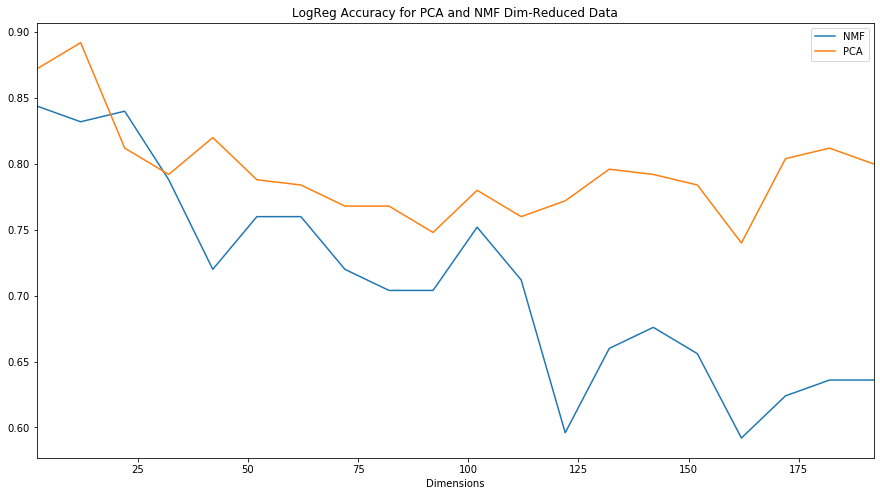

In [5]:
%matplotlib inline
# Streamline testing
index = range(min_dim, min(X.shape) + 1, 10)
# index = range(min_dim, min(X.shape) + 1)
nmf_logreg_accs.index = index
pca_logreg_accs.index = index
# display(nmf_logreg_accs)
# display(pca_logreg_accs)

nmf_logreg_accs.plot.line(title='LogReg Accuracy for PCA and NMF Dim-Reduced Data', legend=True, label='NMF', figsize=(15,8))
ax = pca_logreg_accs.plot.line(legend=True, label='PCA')
ax.set_xlabel("Dimensions")

In [36]:
# Mess around space
# # test = pd.DataFrame([[1,2,3], [2,4,5], [3,4,10]])
# test = pd.DataFrame(np.ones((300, 1000)))
# display(test)
# mdl = NMF(n_components=200)
# pd.DataFrame(mdl.fit_transform(test))


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
296,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
297,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
298,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.3512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.3512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.3512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.3512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.3512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.3512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,1.3512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,1.3512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298,1.3512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Old Below

In [111]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y)
# Using test data because that is what Linear_Regression will use in prediction
Xy = abs(pd.concat([X_test, y_test], axis=1))
nmf_model = NMF(n_components=2)
W = nmf_model.fit_transform(Xy)
H = nmf_model.components_
nmf_preds = pd.DataFrame(W @ H)
# getting the "y" column from the NMF prediction
nmf_y_preds = list(nmf_preds[n_features])


reg_model = LinearRegression().fit(X_train, y_train)
reg_y_preds = reg_model.predict(X_test)
# just pulling the values out since linear regression returns a list of lists
reg_y_preds = [_[0] for _ in reg_y_preds]
nmf_errors = []
reg_errors = []

y_test = list(y_test["class"])

# getting error
for i in range(len(reg_y_preds)):
    reg_errors.append((y_test[i] - reg_y_preds[i]) ** 2)
    nmf_errors.append((y_test[i] - nmf_y_preds[i]) ** 2)

print("nmf", np.mean(nmf_errors))
print("reg", np.mean(reg_errors))

nmf 0.9803111852183711
reg 0.7940561403538158


In [112]:
# A = pd.DataFrame(np.array([[1, 2, 3,], [4, 5, 6], [7, 8, 9], [0, 1, 0]]))
# A. columns = ["a", "b", "c"]
# from sklearn.decomposition import NMF
# y = A["c"]
# X = A.drop("c", axis=1)
# nmf_model = NMF()

# W = nmf_model.fit_transform(A)
# H = nmf_model.components_

# X_train, X_test, y_train, y_test = train_test_split(X, y)
# reg_model = LinearRegression().fit(X_train, y_train)

# display(A)
# preds = reg_model.predict(X_test)